# Overview

This project looks at the relationship between life expectancy and GDP over the course of several years for six countries. 

The questions this project will seek to answer with data preparation and analysis are:

- How has life expectancy changed over time for these six countries?
- What is the correlation between life expectancy and GDP for each country?
- What was distribution of life expectancy for each year?
- Is there a point at which GDP and life expectancy are no longer correlated (i.e. a high or low point for GDP after which life expectancy levels off?
- What is the growth over time of GDP for each country?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


**Import Python Modules**

Import the modules we can expect to use in this project

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Inspect Data

We'll import the data into a dataframe called all_data_df. 

In [6]:
all_data_df = pd.read_csv('all_data.csv')
all_data_df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
print(all_data_df.describe(include='all'))

         Country         Year  Life expectancy at birth (years)           GDP
count         96    96.000000                         96.000000  9.600000e+01
unique         6          NaN                               NaN           NaN
top     Zimbabwe          NaN                               NaN           NaN
freq          16          NaN                               NaN           NaN
mean         NaN  2007.500000                         72.789583  3.880499e+12
std          NaN     4.633971                         10.672882  5.197561e+12
min          NaN  2000.000000                         44.300000  4.415703e+09
25%          NaN  2003.750000                         74.475000  1.733018e+11
50%          NaN  2007.500000                         76.750000  1.280220e+12
75%          NaN  2011.250000                         78.900000  4.067510e+12
max          NaN  2015.000000                         81.000000  1.810000e+13


In [8]:
print(all_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


**Data Inspection Notes**

There are four unique columns of data - country, year, life expectancy and GDP. Country and year are categorical data, though year is currently being read as int. Life expectancy and GDP are correctly being read as quantitative data. 

There are 96 rows of data and none are null, which means we likely have no missing data to worry about. 
Let's find out the unique values for year and countries.

In [9]:
print(all_data_df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [10]:
print(all_data_df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Cleaning the Data

This data is already pretty clean, but it'll be easier to work with if we standardize the column names.

In [11]:
cols = ['country', 'year', 'life_exp', 'gdp']
all_data_df.columns = cols
all_data_df.head()

,country,year,life_exp,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


"United States of America" is also much longer than the other country names, which could create issues when reading axis labels. Let's change it to "USA"

In [22]:
all_data_df.loc[all_data_df['country'] == 'United States of America', 'country'] = 'USA'
print(all_data_df.country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


Renaming the columns so they are all the same length and in lowercase will make it easier to work with the column names in the future, since most Python code doesn't use capital letters.

## Initial Data Summaries

Let's summarize the overall distributions of life expectancy and GDP and get some basic stats before we dig into our questions.

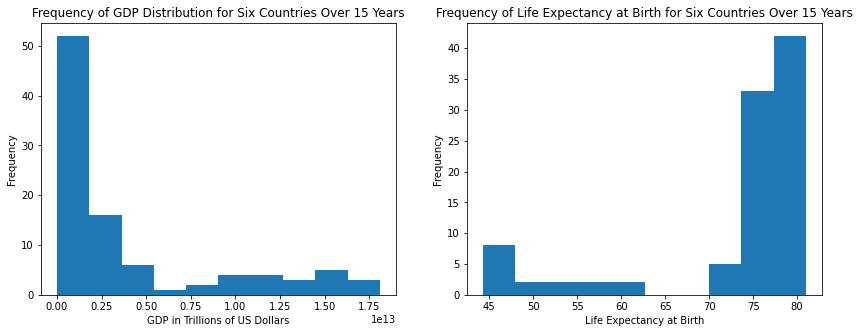

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize = (14, 5))
plt.subplot(1,2,1)
plt.hist(all_data_df.gdp)
plt.xlabel('GDP in Trillions of US Dollars')
plt.ylabel('Frequency')
plt.title('Frequency of GDP Distribution for Six Countries Over 15 Years')
plt.subplot(1,2,2)
plt.hist(all_data_df.life_exp)
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.title('Frequency of Life Expectancy at Birth for Six Countries Over 15 Years')
plt.show()
plt.clf()

The GDP distribution is extremely left-skewed, meaning most of the countries in the data for most of the years had a GDP between 0 and 0.25 trillion USD. 

On the other hand, the frequency of life expectancy at birth is very right-skewed, meaning that most of the countries in the data for most of the years had a life expectancy at birth between 75 and 80 years. 

Initially, this suggests that there may not be such a strong correlation between GDP and life expectancy, but we should dig into the data more before drawing this conclusion.

Next, let's break up the data by country. With six countries, even an overlapping histogram with very low alpha will be confusing, so let's try boxplots.

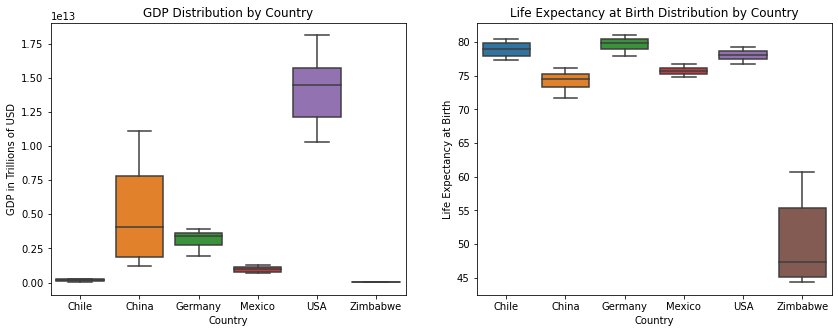

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize = (14, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'country', y = 'gdp', data = all_data_df)
plt.xlabel('Country')
plt.ylabel('GDP in Trillions of USD')
plt.title('GDP Distribution by Country')
plt.subplot(1,2,2)
sns.boxplot(x = 'country', y = 'life_exp', data = all_data_df)
plt.xlabel('Country')
plt.ylabel('Life Expectancy at Birth')
plt.title('Life Expectancy at Birth Distribution by Country')
plt.show()
plt.clf()

These figures show us that for all countries besides China and the US, there was a fairly narrow GDP distribution over the 15-year range. 

For life expectancy at birth, all countries except Zimbabwe had a narrow distribution over the 15-year range. 

Looking at these charts and the previous histograms, I'd hypothesize that the overall correlation between GDP and life expectancy is not that strong - i.e. there's no worldwide standard where a GDP of x is very likely to equal a life expectancy of y. But that doesn't mean that for *individual countries* there is no correlation between an increase or decrease in GDP and an increase or decrease in life expectancy.

Before we move forward, we should plot the overall correlation between life expectancy and GDP in a scatterplot.

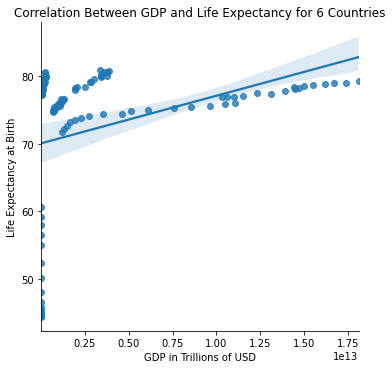

<Figure size 432x288 with 0 Axes>

In [38]:
sns.lmplot(x = 'gdp', y = 'life_exp', data = all_data_df, x_jitter = .15, y_jitter = .15, fit_reg = True)
plt.xlabel('GDP in Trillions of USD')
plt.ylabel('Life Expectancy at Birth')
plt.title('Correlation Between GDP and Life Expectancy for 6 Countries')
plt.show()
plt.clf()

There appears to be a position correlation between life expectancy and GDP starting when life expectancy is 70. Let's calculate the Pearson Correlation for these two variables

In [36]:
from scipy.stats import pearsonr
corr_variable, p = pearsonr(all_data_df.gdp, all_data_df.life_exp)
print(corr_variable)

0.343206748449156


The Pearson Correlation between life expectancy and GDP overall is .34. That's not zero, but it's also not particularly strong. We'll look at the relationship between life expectancy and GDP for each of the six countries separately later.

## How has life expectancy changed over time for these six countries?

Since we're asking about change over time in this question, let's try some line charts. First, let's plot average life expectancy per year overall.

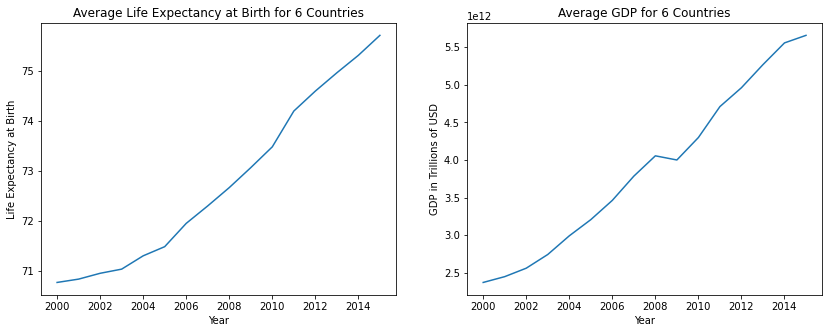

<Figure size 432x288 with 0 Axes>

In [49]:
year_means = all_data_df.drop('country', axis = 1).groupby('year').mean().reset_index()
plt.figure(figsize = (14, 5))
plt.subplot(1,2,1)
plt.plot(year_means.year, year_means.life_exp)
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth')
plt.title('Average Life Expectancy at Birth for 6 Countries')
plt.subplot(1,2,2)
plt.plot(year_means.year, year_means.gdp)
plt.xlabel('Year')
plt.ylabel('GDP in Trillions of USD')
plt.title('Average GDP for 6 Countries')
plt.show()
plt.clf()

This graph shows that there was an increase in mean life expectancy over time for all six countries, from a mean of just under 71 to a mean of close to 76. This corresponded with an increase in mean GDP, with nearly the same slope.

The only year when mean GDP decreased from the previous year was 2009, from 4.05 trillion to 4 trillion. There was a big financial crisis in 2008 that led to a recession, so that's probably why.

Now, let's break it down by country.

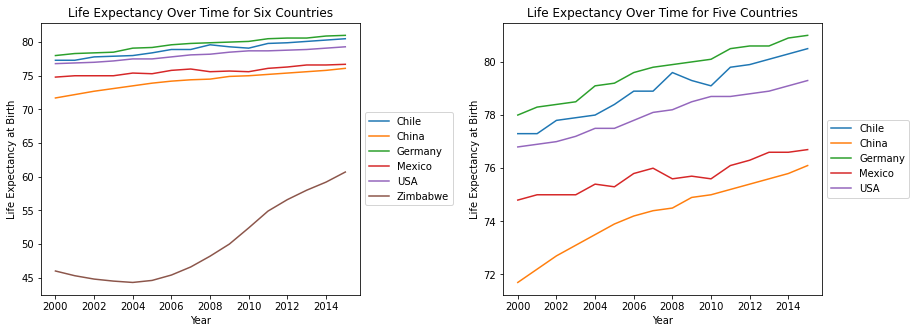

<Figure size 432x288 with 0 Axes>

In [62]:
remove_zimbabwe = all_data_df[all_data_df.country != 'Zimbabwe']
plt.figure(figsize = (14, 5))
plt.subplot(1,2,1)
sns.lineplot(x = all_data_df.year, y = all_data_df.life_exp, hue = all_data_df.country)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth')
plt.title('Life Expectancy Over Time for Six Countries')
plt.subplot(1,2,2)
sns.lineplot(x = remove_zimbabwe.year, y = remove_zimbabwe.life_exp, hue = remove_zimbabwe.country)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth')
plt.title('Life Expectancy Over Time for Five Countries')
plt.subplots_adjust(wspace = 0.45)
plt.show()
plt.clf()

It looks like from the charts that Zimbabwe had the biggest overall increase in life expectancy. In the second chart, I removed Zimbabwe to better see the increase in life expectancy for the other countries. Of the remaining five countries, it looks like China had the biggest life expectancy increase over time. 

I'd like to know the increase in life expectancy in years between 2000 and 2015 for all six countries, so let's calculate those.

In [85]:
countries = all_data_df.country.unique().tolist()
for country in countries:
    life_exp_2000 = all_data_df.loc[(all_data_df.country == country) & (all_data_df.year == 2000), 'life_exp'].values[0]
    life_exp_2015 = all_data_df.loc[(all_data_df.country == country) & (all_data_df.year == 2015), 'life_exp'].values[0]
    life_exp_diff = life_exp_2015 - life_exp_2000
    print(country, round(life_exp_diff,2))

Chile 3.2
China 4.4
Germany 3.0
Mexico 1.9
USA 2.5
Zimbabwe 14.7


Based on these calculations, I was correct that Zimbabwe had the largest increase in life expectancy by far (14.7 years), followed by China (4.4 years).

## What is the correlation between life expectancy and GDP for each country?

This question can best be answered by scatterplots and calculating the Pearson Correlation for each country. 
We could use one scatterplot with the countries broken out by hue, like we did for the line charts, but first I'd like to look at each country individually so the scale isn't thrown off.

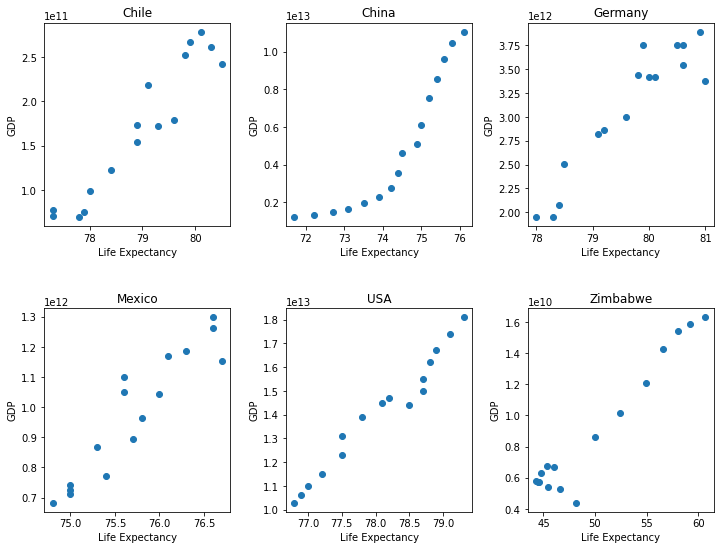

<Figure size 432x288 with 0 Axes>

In [92]:
plt.figure(figsize = (12, 9))
counter = 1
for country in countries:
    plt.subplot(2,3,counter)
    plt.scatter(all_data_df.life_exp[all_data_df.country == country], all_data_df.gdp[all_data_df.country == country])
    plt.xlabel('Life Expectancy')
    plt.ylabel('GDP')
    plt.title(country)
    counter +=1
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.show()
plt.clf()

All the countries have a fairly strong positive correlation between GDP and life expectancy, though China's looks more exponential. Let's calculate the Pearson Correlations for each country

In [93]:
for country in countries:
    corr_variable, p = pearsonr(all_data_df.life_exp[all_data_df.country == country], all_data_df.gdp[all_data_df.country == country])
    print(country, corr_variable)

Chile 0.9498766659254416
China 0.9085255408648358
Germany 0.9326988982561268
Mexico 0.9322377167847081
USA 0.9817092382430257
Zimbabwe 0.9661998955858777


This time the correlation variable for all countries is extremely strong, with China's being the weakest at just under .91. Breaking down the data so that we were just looking at rate of growth for each country really helped answer this question.

## What was distribution of life expectancy for each year?

We can create a bunch of histograms to review the distribution of life expectancy for each year, but with 15 years the data would easily become unreadable. We know from our previous analysis that the mean life expectancy trends upwards in a smooth line, so we should be able to get a good idea of the change in distribution in life expectancy through the years with a selection of 3 or 4 years.

I'm going to use 2000, 2005, 2010, and 2015 to start.

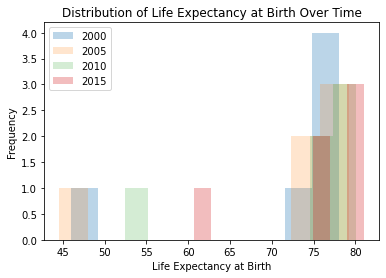

<Figure size 432x288 with 0 Axes>

In [98]:
data_2000 = all_data_df[all_data_df.year == 2000]
data_2005 = all_data_df[all_data_df.year == 2005]
data_2010 = all_data_df[all_data_df.year == 2010]
data_2015 = all_data_df[all_data_df.year == 2015]

plt.hist(data_2000.life_exp, alpha = .3)
plt.hist(data_2005.life_exp, alpha = .2)
plt.hist(data_2010.life_exp, alpha = .2)
plt.hist(data_2015.life_exp, alpha = .3)
plt.legend(['2000', '2005', '2010', '2015'])
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy at Birth Over Time')
plt.show()
plt.clf()

This figure is a bit messy, so let's try three years instead.

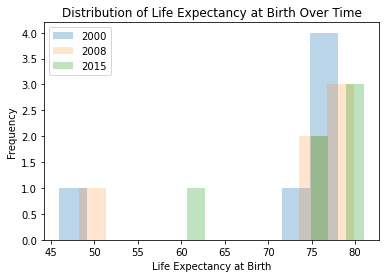

<Figure size 432x288 with 0 Axes>

In [99]:
data_2008 = all_data_df[all_data_df.year == 2008]

plt.hist(data_2000.life_exp, alpha = .3)
plt.hist(data_2008.life_exp, alpha = .2)
plt.hist(data_2015.life_exp, alpha = .3)
plt.legend(['2000', '2008', '2015'])
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy at Birth Over Time')
plt.show()
plt.clf()

This is clearer. In 2008, the majority of life expectancies were clustered at around 75 years. In 2015, they had all moved higher but not at the same rate. From our previous analysis we know that the single values below 65 are Zimbabwe.

Let's do this one more time but remove Zimbabwe since it's an outlier.

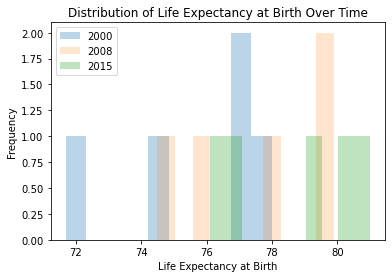

<Figure size 432x288 with 0 Axes>

In [101]:
nz_data_2008 = all_data_df[(all_data_df.year == 2008) & (all_data_df.country != 'Zimbabwe')]
nz_data_2000 = all_data_df[(all_data_df.year == 2000) & (all_data_df.country != 'Zimbabwe')]
nz_data_2015 = all_data_df[(all_data_df.year == 2015) & (all_data_df.country != 'Zimbabwe')]

plt.hist(nz_data_2000.life_exp, alpha = .3)
plt.hist(nz_data_2008.life_exp, alpha = .2)
plt.hist(nz_data_2015.life_exp, alpha = .3)
plt.legend(['2000', '2008', '2015'])
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy at Birth Over Time')
plt.show()
plt.clf()

## Is there a point at which GDP and life expectancy are no longer correlated?

I want to calculate if there is a GDP ceiling after which GDP increases but life expectancy stays the same (or decreases). To do this, I'll look at scatterplots and correlation coefficients for GDP and life expectancy at each quartile of GDP, to see if the correlation is bigger or smaller for different quartiles.

First, calculate the quartiles

In [102]:
gdp_1q = all_data_df.gdp.quantile(0.25)
gdp_2q = all_data_df.gdp.quantile(0.50)
gdp_3q = all_data_df.gdp.quantile(0.75)

In [104]:
gdp_1q_df = all_data_df[(all_data_df.gdp <= gdp_1q)]
gdp_2q_df = all_data_df[(all_data_df.gdp >= gdp_1q) & (all_data_df.gdp <= gdp_2q)]
gdp_3q_df = all_data_df[(all_data_df.gdp >= gdp_2q) & (all_data_df.gdp <= gdp_3q)]
gdp_4q_df = all_data_df[(all_data_df.gdp >= gdp_3q)]

Now we'll plot the scatterplots and calculate the Pearson Correlations for each quartile.

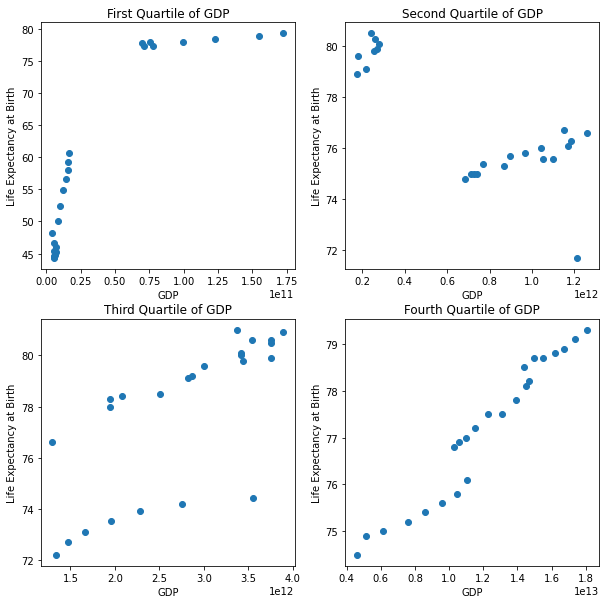

<Figure size 432x288 with 0 Axes>

In [107]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
plt.scatter(gdp_1q_df.gdp, gdp_1q_df.life_exp)
plt.xlabel('GDP')
plt.ylabel('Life Expectancy at Birth')
plt.title('First Quartile of GDP')
plt.subplot(2,2,2)
plt.scatter(gdp_2q_df.gdp, gdp_2q_df.life_exp)
plt.xlabel('GDP')
plt.ylabel('Life Expectancy at Birth')
plt.title('Second Quartile of GDP')
plt.subplot(2,2,3)
plt.scatter(gdp_3q_df.gdp, gdp_3q_df.life_exp)
plt.xlabel('GDP')
plt.ylabel('Life Expectancy at Birth')
plt.title('Third Quartile of GDP')
plt.subplot(2,2,4)
plt.scatter(gdp_4q_df.gdp, gdp_4q_df.life_exp)
plt.xlabel('GDP')
plt.ylabel('Life Expectancy at Birth')
plt.title('Fourth Quartile of GDP')
plt.show()
plt.clf()

In [113]:
gdp_1q_corr, p = pearsonr(gdp_1q_df.gdp, gdp_1q_df.life_exp)
gdp_2q_corr, p = pearsonr(gdp_2q_df.gdp, gdp_2q_df.life_exp)
gdp_3q_corr, p = pearsonr(gdp_3q_df.gdp, gdp_3q_df.life_exp)
gdp_4q_corr, p = pearsonr(gdp_4q_df.gdp, gdp_4q_df.life_exp)

print("Correlation between GDP and life expectancy for the bottom 25% of GDP is " + str(gdp_1q_corr))
print("Correlation between GDP and life expectancy for the second quartile of GDP is " + str(gdp_2q_corr))
print("Correlation between GDP and life expectancy for the third quartile of GDP is " + str(gdp_3q_corr))
print("Correlation between GDP and life expectancy for the fourth quartile of GDP is " + str(gdp_4q_corr))

Correlation between GDP and life expectancy for the bottom 25% of GDP is 0.8805398334080576
Correlation between GDP and life expectancy for the second quartile of GDP is -0.790681100689169
Correlation between GDP and life expectancy for the third quartile of GDP is 0.7244999941231768
Correlation between GDP and life expectancy for the fourth quartile of GDP is 0.9739039867873296


This is interesting. The second quartile has a strong negative correlation coefficient, but I believe it's because of the way I sliced the data. Looking at the scatterplot above, for the second quartile there are two clusters of data. I believe this data is for Chile, whose datapoints got split between the first and second quartile. If we removed those datapoints, or removed the second set of datapoints which I believe are for Mexico, we'd get a strong positive correlation based on the scatterplot.

For the other quartiles, both the scatterplots and the correlation coefficients show a strong positive relationship. For these six countries, it does not appear that there is a GDP ceiling after which life expectancy is not positively affected. 

## What is the growth over time of GDP for each country?

For this question, I will plot six individual line charts. We could plot them all on one chart, but because the USA and China are much higher than everybody else, I think six individual charts will be better to separately review performance for each nation.

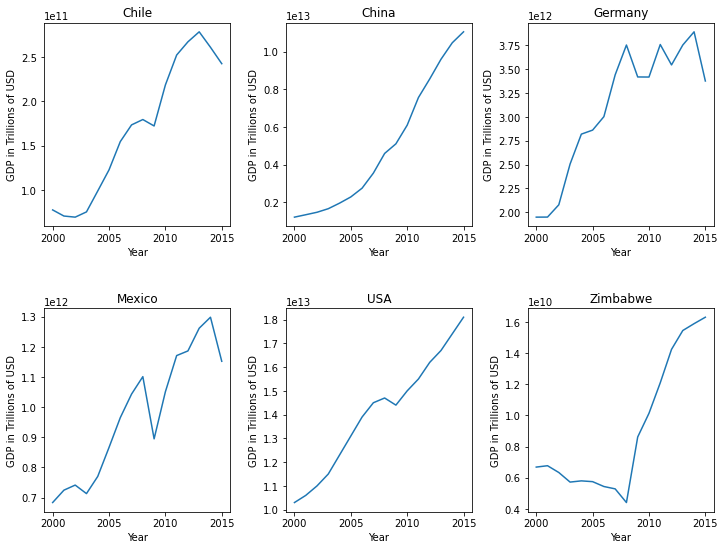

<Figure size 432x288 with 0 Axes>

In [116]:
plt.figure(figsize = (12, 9))
counter = 1
for country in countries:
    plt.subplot(2,3,counter)
    plt.plot(all_data_df.year[all_data_df.country == country], all_data_df.gdp[all_data_df.country == country])
    plt.xlabel('Year')
    plt.ylabel('GDP in Trillions of USD')
    plt.title(country)
    counter +=1
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.show()
plt.clf()

Most countries experienced a drop in GDP from 2008-2009, during the financial crisis, with the exception being China. For Germany, we see a leveling off of GDP after around 2008. The Zimbabwe GDP was also at its lowest in 2008, but has since risen exponentially. This correlates with the rise in life expectancy at around the same time. 

## Conclusions

Regarding the questions posed in the beginning, we were able to answer them through data visualization.

- How has life expectancy changed over time for these six countries?
    Life expectancy increased for all six countries, with Zimbabwe having the biggest increase at 14.7 years. Mexico had the lowest increase at 1.9 years, with the remaining countries having increases between 2.5 and 4.4 years.

- What is the correlation between life expectancy and GDP for each country?
    All the countries have a strong positive correlation between life expectancy and GDP. It seems that the thing that is correlated with increased life expectancy is increased GDP for that country, not hitting a universal GDP number. 

- What was distribution of life expectancy for each year?
    All the life expectation distributions were strongly right-skewed, with Zimbabwe being the outlier on the left. From 2000 to 2015, all life expectancies moved to the right and became slightly more evenly distributed.
    
- Is there a point at which GDP and life expectancy are no longer correlated (i.e. a high or low point for GDP after which life expectancy levels off?
    For the countries we examined, there does not appear to be a point, either high or low, in which life expectancy and GDP stop being strongly correlated.
    
- What is the growth over time of GDP for each country?
    Most countries experienced a drop in GDP from 2008-2009, during the financial crisis, with the exception being China. For Germany, we see a leveling off of GDP after around 2008. The Zimbabwe GDP was also at its lowest in 2008, but has since risen exponentially. Chile and Mexico both recovered after the drop in 2009 and went on to continued growth, as did the US. However, Chile and Mexico had negative GDP growth in 2015, which the US did not experience.
    
I wanted to know why Zimbabwe's growth was so strong after 2009. In 2009, Zimbabwe introduced Dollarization, replacing the Zimbabwean dollar with the US dollar for governemnt transactions. This reversed the previous negative growth and stabilized the banking system. More information available in the [Wikipedia page](https://en.wikipedia.org/wiki/Economy_of_Zimbabwe).